In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

full_df = pd.read_csv('/content/gdrive/MyDrive/Capstone/ed2017_data.csv',low_memory=False)
full_df = full_df.fillna(value=-1)
full_df.head()

,VMONTH,VDAYR,ARRTIME,WAITTIME,BLANK1,AGE,AGER,AGEDAYS,RESIDNCE,SEX,ETHUN,ETHIM,RACEUN,RACER,RACERETH,ARREMS,AMBTRANSFER,NOPAY,PAYPRIV,PAYMCARE,PAYMCAID,PAYWKCMP,PAYSELF,PAYNOCHG,PAYOTH,PAYDK,PAYTYPER,TEMPF,PULSE,RESPR,BPSYS,BPDIAS,POPCT,IMMEDR,PAINSCALE,SEEN72,RFV1,RFV2,RFV3,RFV4,...,RX29CAT3,RX29CAT4,RX29V1C1,RX29V1C2,RX29V1C3,RX29V1C4,RX29V2C1,RX29V2C2,RX29V2C3,RX29V2C4,RX29V3C1,RX29V3C2,RX29V3C3,RX29V3C4,DRUGID30,PRESCR30,CONTSUB30,COMSTAT30,RX30CAT1,RX30CAT2,RX30CAT3,RX30CAT4,RX30V1C1,RX30V1C2,RX30V1C3,RX30V1C4,RX30V2C1,RX30V2C2,RX30V2C3,RX30V2C4,RX30V3C1,RX30V3C2,RX30V3C3,RX30V3C4,SETTYPE,YEAR,CSTRATM,CPSUM,PATWT,EDWT
0,6,6,2056,72,-1.0,27,3,-7,1,2,2,2,1,1,1,2,-7,0,1,0,0,0,0,0,0,0,1,982,72,16,124,74,100,4,5,2,52200,-9,-9,-9,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3,2017,40100000,4,3723.12641,21.58043
1,6,2,1417,64,-1.0,1,1,-7,1,1,1,1,-9,1,3,2,-7,0,0,0,1,0,0,0,0,0,3,1014,151,24,-9,-9,98,4,-8,2,14400,10100,-9,-9,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3,2017,40100000,4,3723.12641,-1.00000
2,6,2,2303,-7,-1.0,52,4,-7,1,2,2,2,1,1,1,2,-7,0,1,0,0,0,0,0,0,0,1,973,124,16,100,60,98,3,-9,2,15451,-9,-9,-9,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3,2017,40100000,4,3723.12641,-1.00000
3,6,5,930,29,-1.0,5,1,-7,1,2,2,2,1,1,1,2,-7,0,1,0,0,0,0,0,0,0,1,983,81,22,-9,-9,99,4,-8,2,14400,-9,-9,-9,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3,2017,40100000,4,3723.12641,-1.00000
4,6,2,1332,20,-1.0,4,1,-7,1,1,2,2,1,1,1,2,-7,0,0,0,1,0,0,0,0,0,3,976,98,20,107,56,98,4,-9,2,55700,-9,-9,-9,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3,2017,40100000,4,3723.12641,-1.00000


In [54]:
full_df.shape

(16709, 949)

In [55]:
subset_df = full_df.iloc[:,:36].drop(columns=["BLANK1"])

In [ ]:
subset_df.corr()

## PREPROCESSING ##



In [56]:
subset_df = full_df[["WAITTIME","AGE","TEMPF","SEX","IMMEDR","PAINSCALE"]]
subset_df

,WAITTIME,AGE,TEMPF,SEX,IMMEDR,PAINSCALE
0,72,27,982,2,4,5
1,64,1,1014,1,4,-8
2,-7,52,973,2,3,-9
3,29,5,983,2,4,-8
4,20,4,976,1,4,-9
...,...,...,...,...,...,...
16704,8,24,970,2,3,10
16705,23,36,976,1,3,8
16706,96,40,971,2,3,3
16707,33,75,971,1,3,9


In [57]:
subset_df.isnull().sum()

WAITTIME     0
AGE          0
TEMPF        0
SEX          0
IMMEDR       0
PAINSCALE    0
dtype: int64

In [58]:
subset_df = subset_df[subset_df["WAITTIME"] != -9]
subset_df = subset_df[subset_df["WAITTIME"] != -7]
subset_df = subset_df[subset_df["WAITTIME"] != 0]

subset_df = subset_df[subset_df["AGE"] != 0]
subset_df = subset_df[subset_df["SEX"] != 0]
subset_df = subset_df[subset_df["IMMEDR"] != 0]
subset_df = subset_df[subset_df["PAINSCALE"] != 0]

In [9]:
sexUniq = subset_df["SEX"].unique()
print(sexUniq)

[2 1]


In [59]:
subset_df = subset_df[subset_df["TEMPF"] != -9]

subset_df = subset_df[subset_df["IMMEDR"] != -9]
subset_df = subset_df[subset_df["IMMEDR"] != -8]

subset_df = subset_df[subset_df["PAINSCALE"] != -9]
subset_df = subset_df[subset_df["PAINSCALE"] != -8]

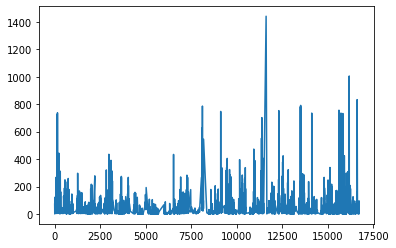

In [11]:
plt.plot(subset_df["WAITTIME"])

In [60]:
subset_df = subset_df[subset_df["WAITTIME"] < 45]
# subset_df = subset_df[subset_df["WAITTIME"] > 5]

In [ ]:
subset_df[["WAITTIME"]] == 0

,WAITTIME
5,False
11,False
12,False
14,False
16,False
...,...
16699,False
16704,False
16705,False
16707,False


In [61]:
subset_df['TEMPF'] = subset_df['TEMPF'].apply(lambda x: (x*0.1 - 32) * 5/9 )
subset_df

,WAITTIME,AGE,TEMPF,SEX,IMMEDR,PAINSCALE
5,2,63,36.833333,2,3,2
11,18,27,36.944444,1,4,5
12,3,27,37.111111,2,3,10
14,9,44,36.777778,1,3,6
16,15,38,36.444444,1,4,6
...,...,...,...,...,...,...
16699,4,33,37.222222,2,4,3
16704,8,24,36.111111,2,3,10
16705,23,36,36.444444,1,3,8
16707,33,75,36.166667,1,3,9


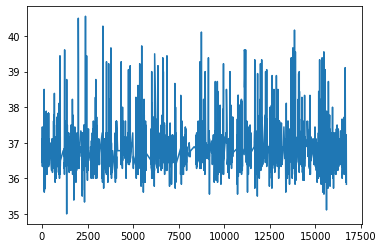

In [62]:
plt.plot(subset_df["TEMPF"])

In [63]:
subset_df = subset_df[subset_df["TEMPF"] > 34]
subset_df = subset_df[subset_df["TEMPF"] < 42]

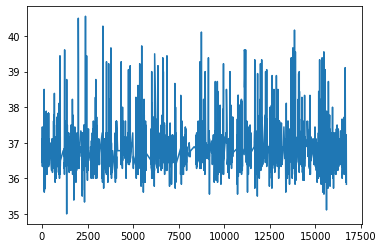

In [64]:
plt.plot(subset_df["TEMPF"])

In [65]:
subset_df

,WAITTIME,AGE,TEMPF,SEX,IMMEDR,PAINSCALE
5,2,63,36.833333,2,3,2
11,18,27,36.944444,1,4,5
12,3,27,37.111111,2,3,10
14,9,44,36.777778,1,3,6
16,15,38,36.444444,1,4,6
...,...,...,...,...,...,...
16699,4,33,37.222222,2,4,3
16704,8,24,36.111111,2,3,10
16705,23,36,36.444444,1,3,8
16707,33,75,36.166667,1,3,9


In [66]:
def categorical_waitTime (x):
  if x <= 5:
    x = 5
  elif  x > 5 and x <= 15:
    x = 15
  elif x > 15 and x <=25:
    x= 25
  elif x > 25 and x <=35:
    x= 35
  elif x > 35 and x <=45:
    x= 45
  return x

def categorical_temp (x):
  if x <= 36.6 :
    x = 1
  elif x > 36.6:
    x = 2
  return x

def categorical_age (x):
  if x < 15:
    x = 1
  elif  x > 25 and x <= 15:
    x = 2
  elif x > 15 and x <=25:
    x= 3
  elif x > 45 and x <=35:
    x= 4
  elif x > 65 and x <=45:
    x= 5
  elif x > 75 and x <=65:
    x= 6
  return x


In [67]:
subset_df["WAITTIME"] = subset_df["WAITTIME"].apply(categorical_waitTime)
subset_df["TEMPF"] = subset_df["TEMPF"].apply(categorical_temp)
subset_df["AGE"] = subset_df["AGE"].apply(categorical_temp)

In [68]:
subset_df

,WAITTIME,AGE,TEMPF,SEX,IMMEDR,PAINSCALE
5,5,2,2,2,3,2
11,25,1,2,1,4,5
12,5,1,2,2,3,10
14,15,2,2,1,3,6
16,15,2,1,1,4,6
...,...,...,...,...,...,...
16699,5,1,2,2,4,3
16704,15,1,1,2,3,10
16705,25,1,1,1,3,8
16707,35,2,1,1,3,9


In [69]:
X = subset_df[["AGE","SEX","IMMEDR","PAINSCALE","TEMPF"]] 

y = subset_df["WAITTIME"]

In [70]:
#Split Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)

In [71]:
X_train.shape, X_test.shape


((2989, 5), (1282, 5))

In [30]:
X_train = pd.get_dummies(X_train, columns = ['SEX','AGE','IMMEDR','PAINSCALE',"TEMPF"])
X_train

,SEX_1,SEX_2,AGE_1,AGE_2,IMMEDR_1,IMMEDR_2,IMMEDR_3,IMMEDR_4,IMMEDR_5,IMMEDR_7,PAINSCALE_1,PAINSCALE_2,PAINSCALE_3,PAINSCALE_4,PAINSCALE_5,PAINSCALE_6,PAINSCALE_7,PAINSCALE_8,PAINSCALE_9,PAINSCALE_10,TEMPF_1,TEMPF_2
7948,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
10303,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
15226,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
15910,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
7149,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4444,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3527,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1915,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
stdscal = StandardScaler()
scale = stdscal.fit_transform(X_train)

In [33]:
X_train = pd.DataFrame(scale,columns=list(X_train.columns.values))
X_train

,SEX_1,SEX_2,AGE_1,AGE_2,IMMEDR_1,IMMEDR_2,IMMEDR_3,IMMEDR_4,IMMEDR_5,IMMEDR_7,PAINSCALE_1,PAINSCALE_2,PAINSCALE_3,PAINSCALE_4,PAINSCALE_5,PAINSCALE_6,PAINSCALE_7,PAINSCALE_8,PAINSCALE_9,PAINSCALE_10,TEMPF_1,TEMPF_2
0,0.84433,-0.84433,-0.990344,0.990344,-0.071019,3.074256,-0.994329,-0.706929,-0.186049,-0.191748,-0.123634,4.137046,-0.25314,-0.280485,-0.361226,-0.358260,-0.386801,-0.485422,-0.309313,-0.435218,-0.622616,0.622616
1,0.84433,-0.84433,-0.990344,0.990344,-0.071019,-0.325282,1.005704,-0.706929,-0.186049,-0.191748,-0.123634,-0.241718,-0.25314,-0.280485,-0.361226,-0.358260,-0.386801,-0.485422,-0.309313,2.297697,-0.622616,0.622616
2,-1.18437,1.18437,1.009750,-1.009750,-0.071019,-0.325282,-0.994329,-0.706929,5.374942,-0.191748,-0.123634,-0.241718,-0.25314,-0.280485,-0.361226,-0.358260,-0.386801,2.060063,-0.309313,-0.435218,-0.622616,0.622616
3,0.84433,-0.84433,1.009750,-1.009750,-0.071019,-0.325282,-0.994329,1.414568,-0.186049,-0.191748,-0.123634,-0.241718,-0.25314,3.565250,-0.361226,-0.358260,-0.386801,-0.485422,-0.309313,-0.435218,-0.622616,0.622616
4,0.84433,-0.84433,1.009750,-1.009750,-0.071019,-0.325282,1.005704,-0.706929,-0.186049,-0.191748,-0.123634,-0.241718,-0.25314,-0.280485,-0.361226,-0.358260,-0.386801,2.060063,-0.309313,-0.435218,1.606126,-1.606126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,-1.18437,1.18437,-0.990344,0.990344,-0.071019,-0.325282,1.005704,-0.706929,-0.186049,-0.191748,-0.123634,-0.241718,-0.25314,-0.280485,-0.361226,-0.358260,-0.386801,-0.485422,-0.309313,2.297697,-0.622616,0.622616
2985,-1.18437,1.18437,1.009750,-1.009750,-0.071019,-0.325282,-0.994329,1.414568,-0.186049,-0.191748,-0.123634,4.137046,-0.25314,-0.280485,-0.361226,-0.358260,-0.386801,-0.485422,-0.309313,-0.435218,-0.622616,0.622616
2986,0.84433,-0.84433,1.009750,-1.009750,-0.071019,-0.325282,-0.994329,-0.706929,-0.186049,5.215181,-0.123634,-0.241718,-0.25314,-0.280485,-0.361226,-0.358260,-0.386801,-0.485422,-0.309313,2.297697,-0.622616,0.622616
2987,0.84433,-0.84433,1.009750,-1.009750,-0.071019,-0.325282,1.005704,-0.706929,-0.186049,-0.191748,-0.123634,-0.241718,-0.25314,-0.280485,-0.361226,2.791268,-0.386801,-0.485422,-0.309313,-0.435218,-0.622616,0.622616


In [34]:
X_test = pd.get_dummies(X_test, columns = ['SEX','AGE','IMMEDR','PAINSCALE',"TEMPF"])
X_test

,SEX_1,SEX_2,AGE_1,AGE_2,IMMEDR_1,IMMEDR_2,IMMEDR_3,IMMEDR_4,IMMEDR_5,IMMEDR_7,PAINSCALE_1,PAINSCALE_2,PAINSCALE_3,PAINSCALE_4,PAINSCALE_5,PAINSCALE_6,PAINSCALE_7,PAINSCALE_8,PAINSCALE_9,PAINSCALE_10,TEMPF_1,TEMPF_2
1407,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
10340,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1483,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
12753,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
8992,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10759,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
13431,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2777,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
9682,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [35]:
stdscal = StandardScaler()
scale = stdscal.fit_transform(X_test)

In [36]:
X_test = pd.DataFrame(scale,columns=list(X_test.columns.values))
X_test

,SEX_1,SEX_2,AGE_1,AGE_2,IMMEDR_1,IMMEDR_2,IMMEDR_3,IMMEDR_4,IMMEDR_5,IMMEDR_7,PAINSCALE_1,PAINSCALE_2,PAINSCALE_3,PAINSCALE_4,PAINSCALE_5,PAINSCALE_6,PAINSCALE_7,PAINSCALE_8,PAINSCALE_9,PAINSCALE_10,TEMPF_1,TEMPF_2
0,0.904677,-0.904677,1.028487,-1.028487,-0.079243,-0.321357,1.054527,-0.727896,-0.217682,-0.190731,-0.138123,-0.243935,-0.266479,-0.284507,-0.354329,2.939234,-0.380319,-0.463860,-0.340225,-0.438814,-0.661226,0.661226
1,0.904677,-0.904677,1.028487,-1.028487,-0.079243,-0.321357,-0.948293,1.373822,-0.217682,-0.190731,-0.138123,-0.243935,-0.266479,-0.284507,-0.354329,-0.340225,2.629369,-0.463860,-0.340225,-0.438814,-0.661226,0.661226
2,-1.105367,1.105367,-0.972302,0.972302,-0.079243,3.111805,-0.948293,-0.727896,-0.217682,-0.190731,7.239936,-0.243935,-0.266479,-0.284507,-0.354329,-0.340225,-0.380319,-0.463860,-0.340225,-0.438814,-0.661226,0.661226
3,-1.105367,1.105367,-0.972302,0.972302,-0.079243,-0.321357,-0.948293,-0.727896,4.593849,-0.190731,-0.138123,-0.243935,-0.266479,-0.284507,-0.354329,-0.340225,-0.380319,2.155824,-0.340225,-0.438814,-0.661226,0.661226
4,0.904677,-0.904677,-0.972302,0.972302,-0.079243,-0.321357,1.054527,-0.727896,-0.217682,-0.190731,-0.138123,-0.243935,-0.266479,-0.284507,-0.354329,2.939234,-0.380319,-0.463860,-0.340225,-0.438814,-0.661226,0.661226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,0.904677,-0.904677,1.028487,-1.028487,-0.079243,-0.321357,1.054527,-0.727896,-0.217682,-0.190731,-0.138123,-0.243935,-0.266479,-0.284507,-0.354329,-0.340225,2.629369,-0.463860,-0.340225,-0.438814,1.512342,-1.512342
1278,0.904677,-0.904677,1.028487,-1.028487,-0.079243,-0.321357,-0.948293,1.373822,-0.217682,-0.190731,-0.138123,-0.243935,-0.266479,-0.284507,-0.354329,-0.340225,-0.380319,-0.463860,-0.340225,2.278867,-0.661226,0.661226
1279,0.904677,-0.904677,-0.972302,0.972302,-0.079243,-0.321357,-0.948293,1.373822,-0.217682,-0.190731,-0.138123,-0.243935,-0.266479,-0.284507,-0.354329,-0.340225,-0.380319,-0.463860,2.939234,-0.438814,-0.661226,0.661226
1280,-1.105367,1.105367,-0.972302,0.972302,-0.079243,-0.321357,1.054527,-0.727896,-0.217682,-0.190731,-0.138123,-0.243935,-0.266479,-0.284507,-0.354329,2.939234,-0.380319,-0.463860,-0.340225,-0.438814,-0.661226,0.661226


In [37]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [73]:
rfc=RandomForestClassifier(random_state=42)

In [74]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [75]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [76]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [77]:
rfc1=RandomForestClassifier(random_state=30, max_features='auto', n_estimators= 200, max_depth=4, criterion='entropy')

In [78]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [79]:
y_pred=rfc1.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [80]:
from sklearn.metrics import accuracy_score

print('{0:0.4f}'. format(accuracy_score(y_test, y_pred)))

0.3643


In [85]:
filename = 'weight_model_waittime'
pickle.dump(rfc1,open(filename,'wb'))

In [82]:
load_model = pickle.load(open(filename,'rb'))

In [84]:
pred_result = load_model.predict([[2,3,4,2,2]])
pred_result

array([15])